In [230]:
import os
import sqlite3
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from operator import itemgetter, attrgetter

In [15]:
Path('data_base.db').touch()

In [16]:
conn = sqlite3.connect('data_base.db') # criando e conectando o banco de dados
c = conn.cursor()

In [17]:
# criando a tabela de localidades
c.execute('''
    CREATE TABLE localidades (
        id_localidade int, 
        nome_localidade text, 
        id_uf int, 
        sigla_uf text, 
        nome_uf text, 
        id_regiao int, 
        nome_regiao text
    )
''')

In [18]:
# alimentando a tabela com os dados do csv gerado anteriormente
localidades = pd.read_csv('localidade.csv')
localidades.to_sql('localidades', conn, if_exists='append', index=False)

5570

In [19]:
c.execute('''SELECT * FROM localidades''').fetchall()

[(1100015, "Alta Floresta D'Oeste", 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100023, 'Ariquemes', 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100031, 'Cabixi', 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100049, 'Cacoal', 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100056, 'Cerejeiras', 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100064, 'Colorado do Oeste', 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100072, 'Corumbiara', 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100080, 'Costa Marques', 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100098, "Espigão D'Oeste", 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100106, 'Guajará-Mirim', 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100114, 'Jaru', 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100122, 'Ji-Paraná', 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100130, "Machadinho D'Oeste", 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100148, "Nova Brasilândia D'Oeste", 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100155, 'Ouro Preto do Oeste', 11, 'RO', 'Rondônia', 1, 'Norte'),
 (1100189, 'Pimenta Bueno', 11, 'RO', 'Rondônia', 1, 'No

In [20]:
# criando a tabela nomes
c.execute('''CREATE TABLE nomes (nome text, id_localidade int, periodo text, frequencia int)''')

In [22]:
# alimentando a tabela com o csv gerado anteriormente
nomes = pd.read_csv('nomes_localidade.csv')
nomes.to_sql('nomes', conn, if_exists='append', index=False)

260158

In [23]:
c.execute('''SELECT * FROM nomes''').fetchall()

[('MARIA', 1100015, '1930[', 14),
 ('MARIA', 1100015, '[1930,1940[', 46),
 ('MARIA', 1100015, '[1940,1950[', 128),
 ('MARIA', 1100015, '[1950,1960[', 229),
 ('MARIA', 1100015, '[1960,1970[', 293),
 ('MARIA', 1100015, '[1970,1980[', 216),
 ('MARIA', 1100015, '[1980,1990[', 89),
 ('MARIA', 1100015, '[1990,2000[', 46),
 ('MARIA', 1100015, '[2000,2010[', 74),
 ('JOSE', 1100015, '1930[', 13),
 ('JOSE', 1100015, '[1930,1940[', 46),
 ('JOSE', 1100015, '[1940,1950[', 77),
 ('JOSE', 1100015, '[1950,1960[', 121),
 ('JOSE', 1100015, '[1960,1970[', 182),
 ('JOSE', 1100015, '[1970,1980[', 125),
 ('JOSE', 1100015, '[1980,1990[', 49),
 ('JOSE', 1100015, '[1990,2000[', 26),
 ('JOSE', 1100015, '[2000,2010[', 22),
 ('ANA', 1100015, '[1930,1940[', 10),
 ('ANA', 1100015, '[1940,1950[', 26),
 ('ANA', 1100015, '[1950,1960[', 11),
 ('ANA', 1100015, '[1960,1970[', 23),
 ('ANA', 1100015, '[1970,1980[', 18),
 ('ANA', 1100015, '[1980,1990[', 43),
 ('ANA', 1100015, '[1990,2000[', 69),
 ('ANA', 1100015, '[2000,201

In [24]:
pd.read_sql('''SELECT * FROM localidades l LEFT JOIN nomes n ON l.id_localidade = n.id_localidade''', conn)

,id_localidade,nome_localidade,id_uf,sigla_uf,nome_uf,id_regiao,nome_regiao,nome,id_localidade,periodo,frequencia
0,1100015,Alta Floresta D'Oeste,11,RO,Rondônia,1,Norte,ANA,1100015.0,"[1930,1940[",10.0
1,1100015,Alta Floresta D'Oeste,11,RO,Rondônia,1,Norte,ANA,1100015.0,"[1940,1950[",26.0
2,1100015,Alta Floresta D'Oeste,11,RO,Rondônia,1,Norte,ANA,1100015.0,"[1950,1960[",11.0
3,1100015,Alta Floresta D'Oeste,11,RO,Rondônia,1,Norte,ANA,1100015.0,"[1960,1970[",23.0
4,1100015,Alta Floresta D'Oeste,11,RO,Rondônia,1,Norte,ANA,1100015.0,"[1970,1980[",18.0
...,...,...,...,...,...,...,...,...,...,...,...
260181,5300108,Brasília,53,DF,Distrito Federal,5,Centro-Oeste,PEDRO,5300108.0,"[1960,1970[",1393.0
260182,5300108,Brasília,53,DF,Distrito Federal,5,Centro-Oeste,PEDRO,5300108.0,"[1970,1980[",1239.0
260183,5300108,Brasília,53,DF,Distrito Federal,5,Centro-Oeste,PEDRO,5300108.0,"[1980,1990[",2414.0
260184,5300108,Brasília,53,DF,Distrito Federal,5,Centro-Oeste,PEDRO,5300108.0,"[1990,2000[",4961.0


Questionário:

Dos top 10 nomes, qual o nome menos frequente no município de Vera Cruz em São Paulo?
e Qual a quantidade?

R) Dos top 10 o nome menos frequente no município de Vera Cruz em São Paulo é FRANCISCO e a quantidade é 10.

In [25]:
c.execute('''
    SELECT nome, SUM(frequencia)
    FROM localidades l 
    JOIN nomes n
    WHERE l.nome_localidade = "Vera Cruz" AND l.nome_uf = "São Paulo" AND l.id_localidade = n.id_localidade
    GROUP BY n.nome
    ORDER BY SUM(frequencia) '''
).fetchall()

[('FRANCISCO', 10),
 ('LUCAS', 62),
 ('PEDRO', 70),
 ('PAULO', 88),
 ('CARLOS', 93),
 ('ANTONIO', 182),
 ('ANA', 206),
 ('JOAO', 226),
 ('JOSE', 305),
 ('MARIA', 649)]

Quais as cidades do estado do Acre possuem a maior quantidade de Ana ?

R) Assumindo as 5 cidades do estado do Acre com maior quantidade de Ana são elas:
1 - Rio Branco - 5578;
2 - Cruzeiro do Sul - 1170;
3 - Tarauacá - 446;
4 - Sena Madureira - 446;
5 - Feijó - 298

In [252]:
c.execute('''
    SELECT nome_localidade, sigla_uf, SUM(frequencia)
    FROM localidades l 
    JOIN nomes n
    WHERE l.nome_uf = "Acre" AND l.id_localidade = n.id_localidade AND n.nome = "ANA" 
    GROUP BY l.nome_localidade
    ORDER BY SUM(frequencia) DESC
''').fetchall()

[('Rio Branco', 'AC', 5578),
 ('Cruzeiro do Sul', 'AC', 1170),
 ('Tarauacá', 'AC', 446),
 ('Sena Madureira', 'AC', 446),
 ('Feijó', 'AC', 298),
 ('Brasiléia', 'AC', 257),
 ('Senador Guiomard', 'AC', 245),
 ('Epitaciolândia', 'AC', 212),
 ('Plácido de Castro', 'AC', 183),
 ('Rodrigues Alves', 'AC', 181),
 ('Mâncio Lima', 'AC', 177),
 ('Xapuri', 'AC', 167),
 ('Porto Acre', 'AC', 165),
 ('Acrelândia', 'AC', 139),
 ('Bujari', 'AC', 97),
 ('Capixaba', 'AC', 96),
 ('Marechal Thaumaturgo', 'AC', 94),
 ('Porto Walter', 'AC', 74),
 ('Manoel Urbano', 'AC', 69),
 ('Jordão', 'AC', 36),
 ('Assis Brasil', 'AC', 35),
 ('Santa Rosa do Purus', 'AC', 22)]

Faça um gráfico temporal que mostra quantos Lucas nasceram nos estados São Paulo, Rio
de Janeiro e Minas Gerais

In [142]:
mg = c.execute('''
    SELECT nome_uf, periodo, frequencia
    FROM localidades l 
    JOIN nomes n
    WHERE l.id_localidade = n.id_localidade AND n.nome = "LUCAS" AND l.nome_uf = "Minas Gerais" 
    GROUP BY nome_uf, periodo
''').fetchall()
mg

[('Minas Gerais', '[1930,1940[', 29),
 ('Minas Gerais', '[1940,1950[', 55),
 ('Minas Gerais', '[1950,1960[', 106),
 ('Minas Gerais', '[1960,1970[', 146),
 ('Minas Gerais', '[1970,1980[', 264),
 ('Minas Gerais', '[1980,1990[', 31),
 ('Minas Gerais', '[1990,2000[', 18),
 ('Minas Gerais', '[2000,2010[', 18)]

In [152]:
sp = c.execute('''
    SELECT nome_uf, periodo, frequencia
    FROM localidades l 
    JOIN nomes n
    WHERE l.id_localidade = n.id_localidade AND n.nome = "LUCAS" AND l.nome_uf = "São Paulo" 
    GROUP BY nome_uf, periodo
''').fetchall()
sp

[('São Paulo', '1930[', 19),
 ('São Paulo', '[1930,1940[', 34),
 ('São Paulo', '[1940,1950[', 10),
 ('São Paulo', '[1950,1960[', 10),
 ('São Paulo', '[1960,1970[', 37),
 ('São Paulo', '[1970,1980[', 12),
 ('São Paulo', '[1980,1990[', 26),
 ('São Paulo', '[1990,2000[', 99),
 ('São Paulo', '[2000,2010[', 72)]

In [154]:
rj = c.execute('''
    SELECT nome_uf, periodo, frequencia
    FROM localidades l 
    JOIN nomes n
    WHERE l.id_localidade = n.id_localidade AND n.nome = "LUCAS" AND l.nome_uf = "Rio de Janeiro" 
    GROUP BY nome_uf, periodo
''').fetchall()
rj

[('Rio de Janeiro', '1930[', 12),
 ('Rio de Janeiro', '[1930,1940[', 25),
 ('Rio de Janeiro', '[1940,1950[', 53),
 ('Rio de Janeiro', '[1950,1960[', 14),
 ('Rio de Janeiro', '[1960,1970[', 13),
 ('Rio de Janeiro', '[1970,1980[', 12),
 ('Rio de Janeiro', '[1980,1990[', 54),
 ('Rio de Janeiro', '[1990,2000[', 500),
 ('Rio de Janeiro', '[2000,2010[', 487)]

In [148]:
matriz_np = np.array(mg)
matriz_ajustada = np.reshape(matriz_np, (len(mg), 3))

#matriz_ajustada

df_mg = pd.DataFrame()

colunas = ['Estado', 'Periodo', 'Frequencia']

df_mg = pd.DataFrame(matriz_ajustada, columns=colunas)

df_mg

,Estado,Periodo,Frequencia
0,Minas Gerais,"[1930,1940[",29
1,Minas Gerais,"[1940,1950[",55
2,Minas Gerais,"[1950,1960[",106
3,Minas Gerais,"[1960,1970[",146
4,Minas Gerais,"[1970,1980[",264
5,Minas Gerais,"[1980,1990[",31
6,Minas Gerais,"[1990,2000[",18
7,Minas Gerais,"[2000,2010[",18


In [150]:
matriz_np = np.array(sp)
matriz_ajustada = np.reshape(matriz_np, (len(sp), 3))

#matriz_ajustada

df_sp = pd.DataFrame()

colunas = ['Estado', 'Periodo', 'Frequencia']

df_sp = pd.DataFrame(matriz_ajustada, columns=colunas)

df_sp

,Estado,Periodo,Frequencia
0,São Paulo,1930[,19
1,São Paulo,"[1930,1940[",34
2,São Paulo,"[1940,1950[",10
3,São Paulo,"[1950,1960[",10
4,São Paulo,"[1960,1970[",37
5,São Paulo,"[1970,1980[",12
6,São Paulo,"[1980,1990[",26
7,São Paulo,"[1990,2000[",99
8,São Paulo,"[2000,2010[",72


In [155]:
matriz_np = np.array(rj)
matriz_ajustada = np.reshape(matriz_np, (len(rj), 3))

#matriz_ajustada

df_rj = pd.DataFrame()

colunas = ['Estado', 'Periodo', 'Frequencia']

df_rj = pd.DataFrame(matriz_ajustada, columns=colunas)

df_rj

,Estado,Periodo,Frequencia
0,Rio de Janeiro,1930[,12
1,Rio de Janeiro,"[1930,1940[",25
2,Rio de Janeiro,"[1940,1950[",53
3,Rio de Janeiro,"[1950,1960[",14
4,Rio de Janeiro,"[1960,1970[",13
5,Rio de Janeiro,"[1970,1980[",12
6,Rio de Janeiro,"[1980,1990[",54
7,Rio de Janeiro,"[1990,2000[",500
8,Rio de Janeiro,"[2000,2010[",487


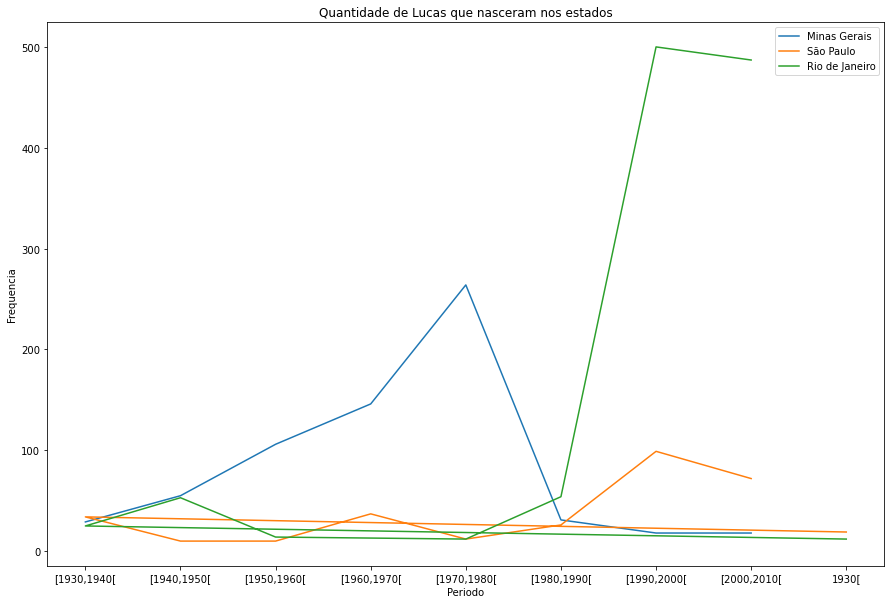

In [251]:
df_mg['Frequencia'] = pd.to_numeric(df_mg['Frequencia'])
df_sp['Frequencia'] = pd.to_numeric(df_sp['Frequencia'])
df_rj['Frequencia'] = pd.to_numeric(df_rj['Frequencia'])

plt.figure(figsize=(15, 10))
plt.plot(df_mg.Periodo, df_mg.Frequencia)
plt.plot(df_sp.Periodo, df_sp.Frequencia)
plt.plot(df_rj.Periodo, df_rj.Frequencia)


plt.xlabel('Periodo')
plt.ylabel('Frequencia')
plt.title('Quantidade de Lucas que nasceram nos estados')
plt.legend(["Minas Gerais", "São Paulo", "Rio de Janeiro"])

plt.show()

Faça um histograma que mostra as TOP 20 cidades onde nasceram mais Pedro, ordenado
pelo nome do estado e Nome da cidade

In [47]:
top20 = c.execute('''
    SELECT nome_uf, nome_localidade, SUM(frequencia)
    FROM localidades l 
    JOIN nomes n
    WHERE l.id_localidade = n.id_localidade AND n.nome = "PEDRO"
    GROUP BY l.nome_localidade
    ORDER BY SUM(frequencia) DESC, l.nome_uf ASC, l.nome_localidade ASC
    LIMIT 20
''').fetchall()

In [236]:
top20 = sorted(top20, key=itemgetter(0, 1))

top20

[('Alagoas', 'Maceió', 5634),
 ('Amazonas', 'Manaus', 9508),
 ('Bahia', 'Salvador', 11755),
 ('Ceará', 'Fortaleza', 18835),
 ('Distrito Federal', 'Brasília', 21347),
 ('Goiás', 'Goiânia', 9805),
 ('Maranhão', 'São Luís', 6238),
 ('Minas Gerais', 'Belo Horizonte', 18507),
 ('Paraná', 'Curitiba', 10726),
 ('Pará', 'Belém', 8343),
 ('Pernambuco', 'Recife', 9309),
 ('Piauí', 'Teresina', 6027),
 ('Rio Grande do Norte', 'Campo Grande', 5086),
 ('Rio Grande do Norte', 'Natal', 5815),
 ('Rio Grande do Sul', 'Porto Alegre', 8498),
 ('Rio de Janeiro', 'Rio de Janeiro', 43104),
 ('Rio de Janeiro', 'São Gonçalo', 5550),
 ('São Paulo', 'Campinas', 7499),
 ('São Paulo', 'Guarulhos', 6740),
 ('São Paulo', 'São Paulo', 69003)]

In [237]:
matriz_np = np.array(top20)
matriz_ajustada = np.reshape(matriz_np, (20,3))

#matriz_ajustada

df_top20 = pd.DataFrame()

colunas = ['Estado', 'Cidade', 'Frequencia']

df_top20 = pd.DataFrame(matriz_ajustada, columns=colunas)

df_top20

,Estado,Cidade,Frequencia
0,Alagoas,Maceió,5634
1,Amazonas,Manaus,9508
2,Bahia,Salvador,11755
3,Ceará,Fortaleza,18835
4,Distrito Federal,Brasília,21347
5,Goiás,Goiânia,9805
6,Maranhão,São Luís,6238
7,Minas Gerais,Belo Horizonte,18507
8,Paraná,Curitiba,10726
9,Pará,Belém,8343


In [248]:
test = []

for i in range(len(top20)):
    test.append(top20[i][2])
    
test

[5634,
 9508,
 11755,
 18835,
 21347,
 9805,
 6238,
 18507,
 10726,
 8343,
 9309,
 6027,
 5086,
 5815,
 8498,
 43104,
 5550,
 7499,
 6740,
 69003]

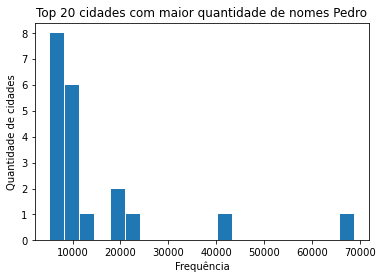

In [249]:
plt.hist(test, 20, rwidth=0.9)

plt.title('Top 20 cidades com maior quantidade de nomes Pedro')
plt.xlabel('Frequência') 
plt.ylabel('Quantidade de cidades') 
plt.show()